# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()

<AxesSubplot:>

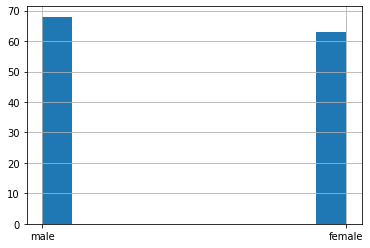

In [2]:
df.Gender.hist()

In [3]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [4]:
# sns.pairplot(df, hue='Gender')

In [5]:
#Reference for Strip: https://www.geeksforgeeks.org/python-string-strip/
df.rename(columns = {'Height (cm)':'Height_Cm',
                     'Weight (kg)':'Weight_Kg',
                     'Education Level':'EducationLevel',
                     'Income (USD)': 'Income_USD', 
                     'Favorite Color':'favouriteColor',
                     'Marital Status':'maritalStatus'}, inplace = True)

In [6]:
df

,Gender,Age,Height_Cm,Weight_Kg,Occupation,EducationLevel,maritalStatus,Income_USD,favouriteColor
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


In [7]:
df.maritalStatus.value_counts()

Married      41
Single       38
 Married     24
 Single      21
 Divorced     4
 Widowed      2
Divorced      1
Name: maritalStatus, dtype: int64

In [8]:
df.EducationLevel.value_counts()

Bachelor's Degree      49
 Bachelor's Degree     29
Associate's Degree     12
 Master's Degree       10
Master's Degree        10
Doctorate Degree        9
 Doctorate Degree       6
 Associate's Degree     6
Name: EducationLevel, dtype: int64

In [9]:

df.favouriteColor.value_counts()

Blue       13
Green      13
Purple     11
Red        11
Yellow     10
Orange      9
 Green      8
Black       8
 Blue       8
 Pink       6
 Yellow     6
 Red        6
 Purple     6
 Grey       4
 Black      4
Grey        4
 Orange     3
Pink        1
Name: favouriteColor, dtype: int64

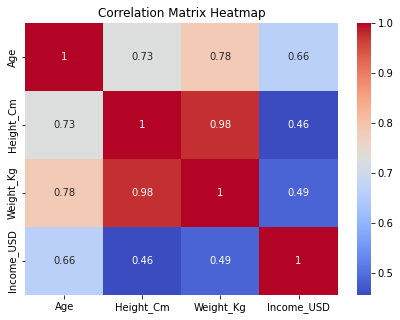

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix Heatmap')
plt.show()


In [11]:
numerical_Vars = []
categorical_Vars = []
def splitting(data_frame):
    for column in data_frame.columns:
        if data_frame[column].dtype == 'int64' or data_frame[column].dtype == 'float64':
            numerical_Vars.append(column)
        elif data_frame[column].dtype == 'object':
            categorical_Vars.append(column)

    return print("The numerical features are:", numerical_Vars ,"\n and The categorical features are:", categorical_Vars)

In [12]:
splitting(df)

The numerical features are: ['Age', 'Height_Cm', 'Weight_Kg', 'Income_USD'] 
 and The categorical features are: ['Gender', 'Occupation', 'EducationLevel', 'maritalStatus', 'favouriteColor']


In [13]:
for col in categorical_Vars:
    unique_vals = df[col].unique()
    print(f"{col}\t{len(unique_vals)}")
    print(unique_vals)

Gender	2
['male' 'female']
Occupation	35
[' Software Engineer' ' Sales Representative' ' Doctor' ' Lawyer'
 ' Graphic Designer' ' Business Consultant' ' Marketing Specialist' ' CEO'
 ' Project Manager' ' Engineer' ' Accountant' ' Architect' ' Nurse'
 ' Analyst' ' Teacher' ' IT Manager' ' Writer' ' Business Analyst'
 'Engineer' 'Teacher' 'Doctor' 'Graphic Designer' 'IT Manager'
 'Sales Representative' 'Lawyer' 'Marketing Specialist' 'Project Manager'
 'Writer' 'Architect' 'Nurse' 'Business Analyst' 'Accountant' 'CEO'
 'Analyst' 'Software Developer']
EducationLevel	8
[" Master's Degree" " Bachelor's Degree" ' Doctorate Degree'
 " Associate's Degree" "Master's Degree" "Bachelor's Degree"
 'Doctorate Degree' "Associate's Degree"]
maritalStatus	7
[' Married' ' Single' ' Divorced' ' Widowed' 'Single' 'Married' 'Divorced']
favouriteColor	18
[' Blue' ' Green' ' Purple' ' Red' ' Yellow' ' Black' ' Pink' ' Orange'
 ' Grey' 'Blue' 'Green' 'Red' 'Orange' 'Purple' 'Yellow' 'Black' 'Grey'
 'Pink']


In [14]:
y = df['Gender']
X = df.drop('Gender', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print('Training examples: {:,}'.format(X_train.shape[0]))
print('Test examples: {:,}'.format(X_test.shape[0]))


Training examples: 104
Test examples: 27


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

In [16]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_Vars)])

In [17]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_Vars),
                                                      ('create_dummies', cat_pipeline, categorical_Vars[1:])])

In [18]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LogisticRegression())
                             ])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height_Cm',
                                                   'Weight_Kg', 'Income_USD']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Occupation',
                                                   'EducationLevel',
                                                   'maritalStatus',
                                                   'favouriteColor'])])),
                ('lm', LogisticRegression())])

In [19]:
y_pred = modeling_pipeline.predict(X_test)
    


In [20]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

1.0

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       1.00      1.00      1.00        11
        male       1.00      1.00      1.00        16

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

